<!DOCTYPE html>
<html>
<head>
    <style>
        @media only screen and (max-width: 600px) {
            .profile-card {
                width: 90vw; /* Full width */
                min-width: initial; /* Override min-width */
                padding: 10px; /* Smaller padding */
            }
            .profile-card h3 {
                font-size: 1em; /* Adjust heading size for small screens */
            }
            .profile-card p {
                font-size: 0.8em; /* Adjust paragraph size for small screens */
            }
            .profile-card img[src*="icons8.com"] {
                width: 24px; /* Smaller icons for social links */
                height: 24px;
                margin-left: initial; /* Override specific margin-left for GitHub icon */
            }
            .profile-card img[alt="Haseeb Ahmad"] {
                top: 10px;
                right: 10px;
                width: 60px; /* Smaller profile picture size */
                height: 60px;
            }
        }
    </style>
</head>
<body>
    <div class="profile-card" style="border: 2px solid #F0E68C; padding: 20px; border-radius: 10px; background-color: #2E2E2E; width: 50vw; max-width: 800px; min-width: 300px; margin: 0 auto; position: relative; color: white;">
        <h3 style="color: upwhite;"><strong>Author Information</strong></h3>
        <p><strong>Name:</strong> Haseeb Ahmad</p>
        <p><strong>Project:</strong> Email Spam Detection</p>
        <p><strong>Code Submission Date :</strong>22/08/2024 </p>
        <p><strong>Contact Details :</strong> </p>
        <a href="https://github.com/HaseebYousafxai/" target="_blank">
            <img src="https://img.icons8.com/color/48/000000/github.png" alt="GitHub" style="margin-right: 10px;margin-left: 250px">
        </a>
        <a href="https://discord.com/channels/haseebahmad./" target="_blank">
            <img src="https://img.icons8.com/color/48/000000/discord.png" alt="Discord" style="margin-right: 10px;">
        </a>
        <a href="https://instagram.com/haseeb_yousafxai?utm_source=qr&igshid=MzNlNGNkZWQ4Mg%3D%3D/" target="_blank">
            <img src="https://img.icons8.com/color/48/000000/instagram-new.png" alt="Instagram" style="margin-right: 10px;">
        </a>
        <a href="https://www.linkedin.com/in/haseebahmadiuse/" target="_blank">
            <img src="https://img.icons8.com/color/48/000000/linkedin.png" alt="LinkedIn" style="margin-right: 10px;">
        </a>
        <a href="mailto:haseebyousafxai81@gmail.com.com">
            <img src="https://img.icons8.com/color/48/000000/email.png" alt="Email">
        </a>
        <img src="Black and Gold Simple Business Man LinkedIn Profile Picture_20240724_165248_0000.png" alt="Haseeb Ahmad" style="position: absolute; top: 30px; right: 60px; border-radius: 50%; width: 120px; height: 120px;">
    </div>
</body>
</html>


## **0.0 Overview**

- **1. Domain and Category:** This project falls under the domain of Data Science and Machine Learning. It focuses on the classification of email messages as either "spam" or "ham" (non-spam).
- **2. Abstract:** Email has become a widely used communication tool, but it is also susceptible to spam messages. Identifying and filtering out spam emails is an important challenge. In this project, we will use Python's text classification techniques to build models that can accurately classify email messages as spam or ham.
- **3. Introduction:** Email has become a powerful and convenient tool for communication, allowing people to transfer messages and data quickly and cost-effectively. However, with the rise of social networks, many emails now contain unwanted information, commonly known as spam. Identifying and filtering out these spam emails is a crucial task. In this project, we will use Python's text classification techniques to develop models that can accurately classify email messages as either spam or ham (non-spam). We will evaluate the performance of different algorithms, such as Naive Bayes, Naive Bayes Multinomial, and Decision Tree, and compare their accuracy, time, and error rates.
- **4. Functional Requirements:** The main tasks to be performed in this project are:
- Collect the dataset for email spam, which should contain both spam and non-spam (ham) messages.
- Preprocess the data to handle any incomplete, noisy, or missing values.
- Apply feature selection algorithms, such as Best First Feature Selection, to identify the most relevant features.
- Implement and apply spam filter algorithms, including Naive Bayes, Naive Bayes Multinomial, and Decision Tree.
- Split the data into training and testing sets (70% for training, 30% for testing).
- Create a confusion matrix to evaluate the performance of the classification models.
- Calculate the accuracy of each algorithm and compare their performance.
- **5. Dataset:** The dataset for this project contains two columns: "category" (which has two values: "ham" and "spam") and "message" (which contains the text of the email messages).

--- 

In [5]:
import warnings
warnings.filterwarnings("ignore")

## **1.0 Import Libraries**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import pickle

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## **Load Dataset**

In [8]:
df = pd.read_csv('spam.csv')

### **🧿Data Observation**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### **Explore and understand the data:**

In [10]:
print(f'The Number of Rows in the dataset is: {df.shape[0]}\nThe Number of Columns in the dataset is: {df.shape[1]}\n')

#sneak peak of the dataset
print('The First five rows of the Dataset is:\n')
print(f'{df.head()}\n')

#Check the distribution of category
print('The Distribution of Category is:')
df['Category'].value_counts()

The Number of Rows in the dataset is: 5572
The Number of Columns in the dataset is: 2

The First five rows of the Dataset is:

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

The Distribution of Category is:


Category
ham     4825
spam     747
Name: count, dtype: int64

### **⚡Data Preprocessing**

In [11]:
#Ading spam feature
df['Spam'] = df['Category'].apply(lambda x:1 if x=='spam' else 0)
df = df[['Message', 'Spam']]
df.head()

,Message,Spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


### **🥽Lowercasing**

In [12]:
df['Message'] = df['Message'].str.lower()
df.head()

,Message,Spam
0,"go until jurong point, crazy.. available only ...",0
1,ok lar... joking wif u oni...,0
2,free entry in 2 a wkly comp to win fa cup fina...,1
3,u dun say so early hor... u c already then say...,0
4,"nah i don't think he goes to usf, he lives aro...",0


### **🍯Removing Punctuation**

In [13]:
#remove punctuations
df['Message'] = df['Message'].str.replace(r'[^\w\s]', '', regex=True)
df.head()

,Message,Spam
0,go until jurong point crazy available only in ...,0
1,ok lar joking wif u oni,0
2,free entry in 2 a wkly comp to win fa cup fina...,1
3,u dun say so early hor u c already then say,0
4,nah i dont think he goes to usf he lives aroun...,0


### **🗑️Removing non-Alphabetical characters**

In [14]:
df['Message'] = df['Message'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
df.head()

,Message,Spam
0,go until jurong point crazy available only in ...,0
1,ok lar joking wif u oni,0
2,free entry in a wkly comp to win fa cup final...,1
3,u dun say so early hor u c already then say,0
4,nah i dont think he goes to usf he lives aroun...,0


### **✂Tokenization**

In [15]:
df['Message'] = df['Message'].str.split()
df.head()

,Message,Spam
0,"[go, until, jurong, point, crazy, available, o...",0
1,"[ok, lar, joking, wif, u, oni]",0
2,"[free, entry, in, a, wkly, comp, to, win, fa, ...",1
3,"[u, dun, say, so, early, hor, u, c, already, t...",0
4,"[nah, i, dont, think, he, goes, to, usf, he, l...",0


### **🧹Removing Stopwords**

In [16]:
stop_words = set(stopwords.words('english'))
df['Message'] = df['Message'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

,Message,Spam
0,"[go, jurong, point, crazy, available, bugis, n...",0
1,"[ok, lar, joking, wif, u, oni]",0
2,"[free, entry, wkly, comp, win, fa, cup, final,...",1
3,"[u, dun, say, early, hor, u, c, already, say]",0
4,"[nah, dont, think, goes, usf, lives, around, t...",0


### **🥯Lematization**

In [17]:
lemmatizer = WordNetLemmatizer()
df['Message'] = df['Message'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df.head()

,Message,Spam
0,"[go, jurong, point, crazy, available, bugis, n...",0
1,"[ok, lar, joking, wif, u, oni]",0
2,"[free, entry, wkly, comp, win, fa, cup, final,...",1
3,"[u, dun, say, early, hor, u, c, already, say]",0
4,"[nah, dont, think, go, usf, life, around, though]",0


### **➿Rejoining the words into sentence**

In [18]:
df['Message'] = df['Message'].apply(lambda x: ' '.join(x))
df.head()

,Message,Spam
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,u dun say early hor u c already say,0
4,nah dont think go usf life around though,0


### **🔢Vectorization**

In [19]:
# Vectorize the emails
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Message'])
print(X[0])
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

print("TfidfVectorizer model has been saved successfully!")

  (0, 2669)	0.15482595951135011
  (0, 3513)	0.34991432802526723
  (0, 5132)	0.23892890113851328
  (0, 1456)	0.2709845600501747
  (0, 460)	0.26608154599358036
  (0, 887)	0.2956090383151331
  (0, 2759)	0.19475744886941995
  (0, 7702)	0.23779337276010057
  (0, 3660)	0.28686783908578817
  (0, 885)	0.3340310489896538
  (0, 1193)	0.2956090383151331
  (0, 2722)	0.1640411678130794
  (0, 233)	0.34991432802526723
  (0, 7478)	0.19951151603143516
TfidfVectorizer model has been saved successfully!


In [20]:
y = df['Spam']

### **⚖️Checking Data Balance**

In [21]:
# Assuming 'df' is your DataFrame and 'target' is the column with class labels
class_counts = df['Spam'].value_counts()
total_samples = len(df)
class_percentages = (class_counts / total_samples) * 100

print("Class Counts:")
print(class_counts)
print("\nClass Percentages:")
print(class_percentages)

Class Counts:
Spam
0    4825
1     747
Name: count, dtype: int64

Class Percentages:
Spam
0    86.593683
1    13.406317
Name: count, dtype: float64


---
>The datset was imbalance the next step we balance the dataset using Oversampling technique.

---

### **🧪Oversampling**

In [22]:
oversampler = RandomOverSampler(random_state = 42)
X, y = oversampler.fit_resample(X,y)

y.value_counts()

Spam
0    4825
1    4825
Name: count, dtype: int64

### **🌗Split the data into Test Train**

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **⛔Implement Spam Filter Algorithms**

In [24]:
# Naive Bayes Classifier
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

### **🆚Compare the Algorithms**


Accuracy Scores:
Naive Bayes Accuracy: 0.9734024179620034
Decision Tree Accuracy: 0.9768566493955095
Random Forest Accuracy: 0.9989637305699481

Confusion Matrices:


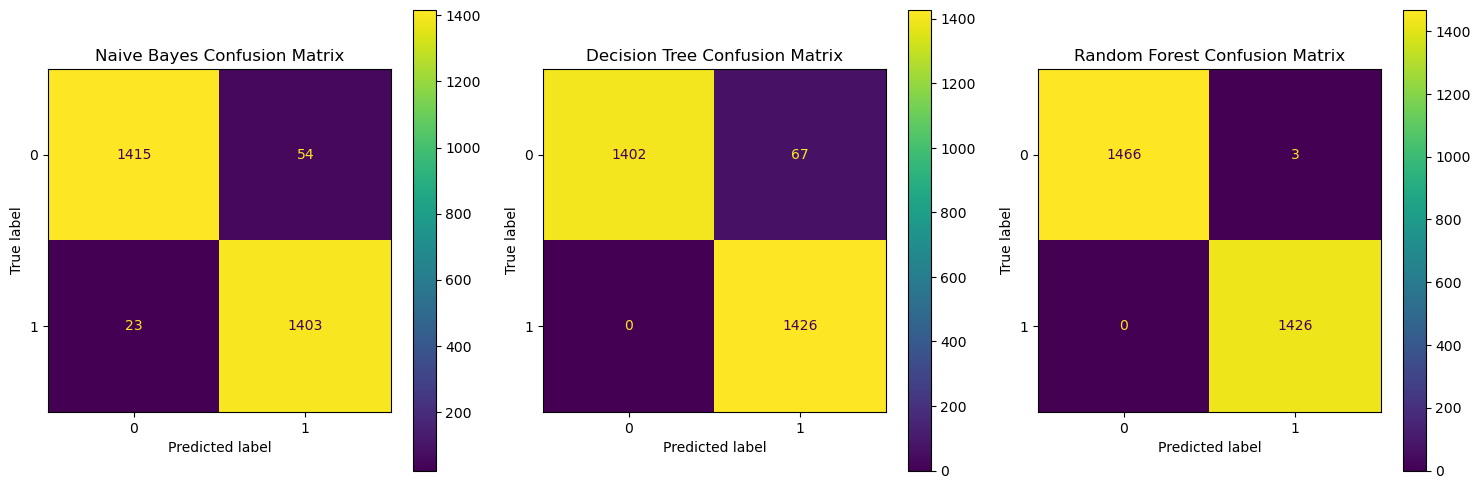


Comparison:
Random Forest is the best-performing algorithm.


In [25]:
# Analyze the accuracy scores
print("\nAccuracy Scores:")
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Analyze the confusion matrices
print("\nConfusion Matrices:")



fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Naive Bayes Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot(ax=axes[0])
axes[0].set_title("Naive Bayes Confusion Matrix")

# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot(ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(ax=axes[2])
axes[2].set_title("Random Forest Confusion Matrix")

plt.tight_layout()
plt.show()

# Analyze the results
print("\nComparison:")
if accuracy_score(y_test, y_pred_nb) > accuracy_score(y_test, y_pred_dt) and accuracy_score(y_test, y_pred_nb) > accuracy_score(y_test, y_pred_rf):
    print("Naive Bayes is the best-performing algorithm.")
elif accuracy_score(y_test, y_pred_dt) > accuracy_score(y_test, y_pred_nb) and accuracy_score(y_test, y_pred_dt) > accuracy_score(y_test, y_pred_rf):
    print("Decision Tree is the best-performing algorithm.")
else:
    print("Random Forest is the best-performing algorithm.")

In [26]:
import pickle

# Define and train the model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Save the model as a .pkl file
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_clf, model_file)

# You can later load the model using:
with open('random_forest_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# You can use the loaded model to predict
y_pred_rf = loaded_model.predict(X_test)
